In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("climate_action_data.csv")
print("Initial Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Values Per Column:")
print(df.nunique())
print("\nSample Data:")
print(df.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB
None

Missing Values:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0

In [5]:
#Remove Duplicates and Replace Errors
df.drop_duplicates(inplace=True)
df.replace("error", np.nan, inplace=True)
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass 

In [6]:
# Handle Missing Values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print("\nFinal Missing Values:")
print(df.isnull().sum())


Missing Values After Cleaning:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

Final Missing Values:

Final Missing Values:

Final Missing Values:

Final Missing Values:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


C:\Users\Julian\AppData\Local\Temp\ipykernel_5392\996020815.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Julian\AppData\Local\Temp\ipykernel_5392\996020815.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [7]:
#Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        802.000000  802.000000      802.000000   802.000000   
mean          44.763726    6.248795       26.460602    60.037265   
std           20.460668    1.021572        4.863290    17.415989   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.947500    5.330000       22.300000    46.025000   
50%           45.230000    6.248795       26.600000    59.850000   
75%           62.555000    7.080000       30.600000    75.275000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     802.000000                  802.000000  
mean                       87.468005                   17.392221  
std                        34.765375                    7.140127  
min                        30.000000                    5.000000  
25%                        

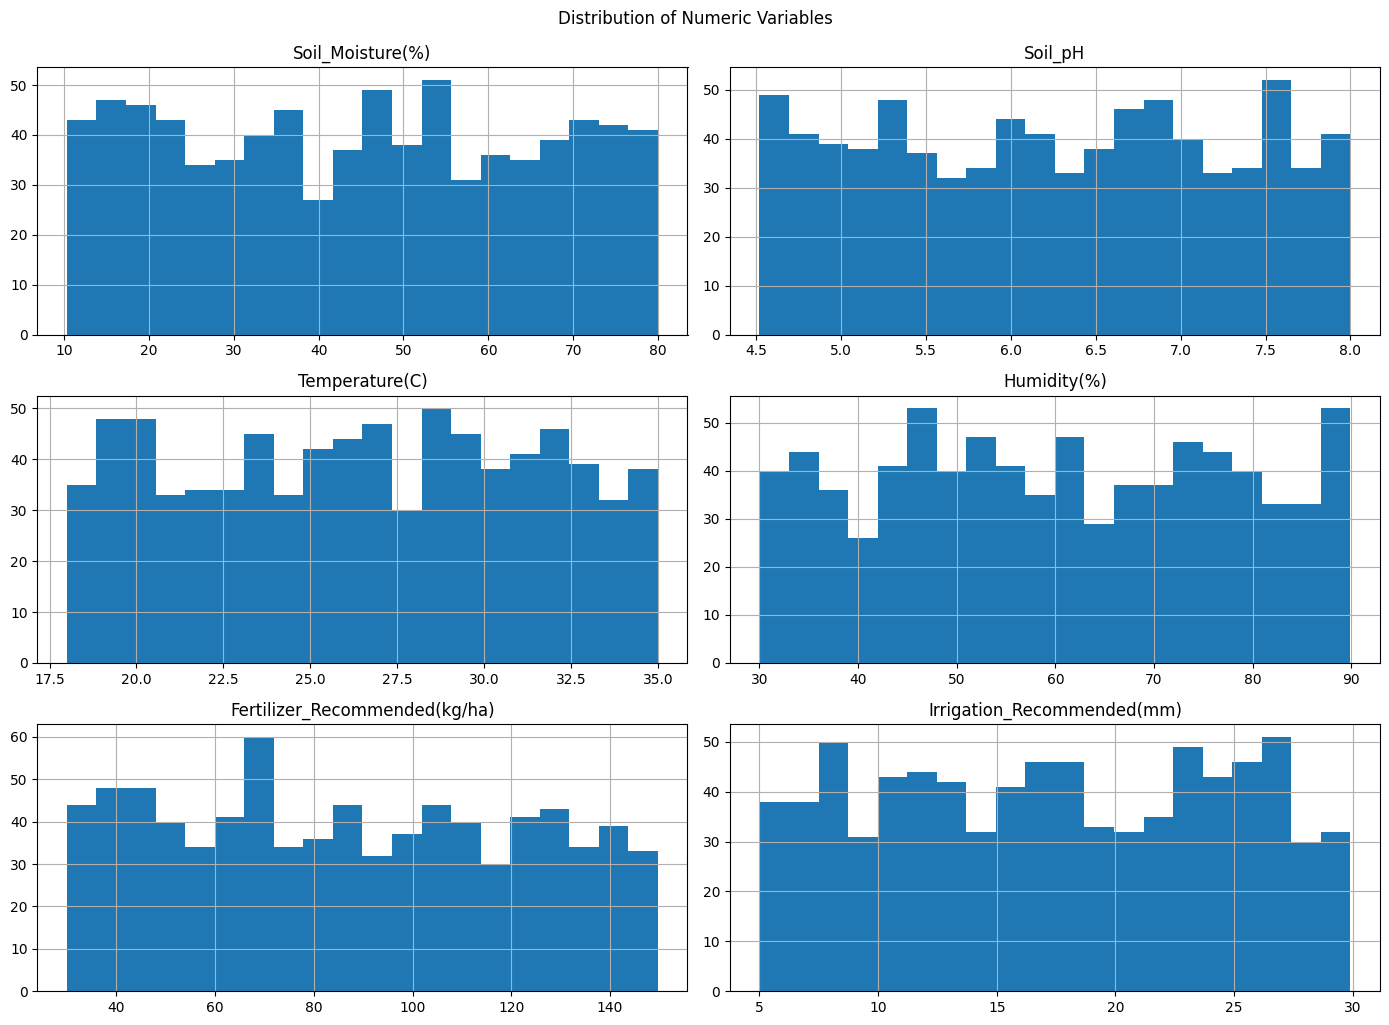

In [8]:
#Plot Histograms
df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.suptitle("Distribution of Numeric Variables", y=1.02)
plt.show()

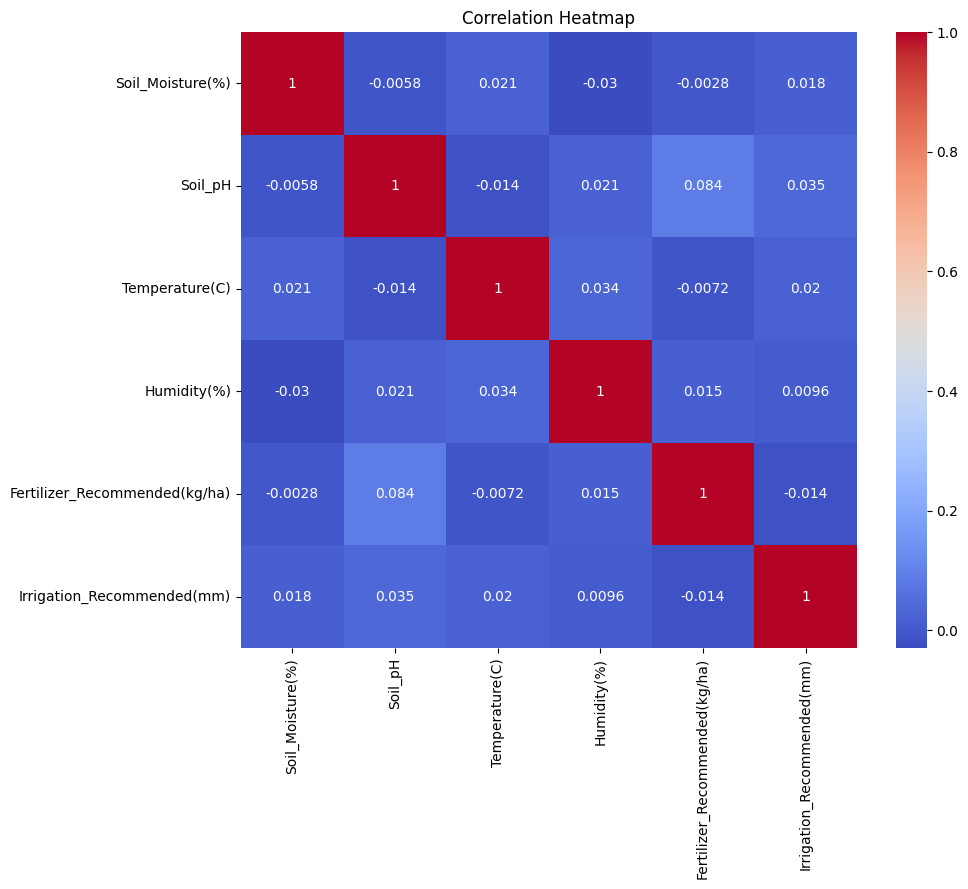

In [9]:
#Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
#Variables Influencing Fertilizer Recommendations
if 'fertilizer_recommendation' in df.columns:
    correlations = df.corr()['fertilizer_recommendation'].sort_values(ascending=False)
    print("\nTop variables influencing fertilizer recommendations:")
    print(correlations[1:6])

In [11]:
#Crop with Highest Average Soil Moisture
if 'crop_type' in df.columns and 'soil_moisture' in df.columns:
    crop_moisture = df.groupby('crop_type')['soil_moisture'].mean().sort_values(ascending=False)
    print("\nCrop Type with Highest Average Soil Moisture:")
    print(crop_moisture.head(1))

In [12]:
# Irrigation Suggestions for High-Temperature Crops
if 'crop_type' in df.columns and 'temperature' in df.columns:
    hot_rows = df[df['temperature'] > 30]
    if not hot_rows.empty:
        hot_crops = hot_rows.groupby('crop_type')['temperature'].mean()
        hot_crops = hot_crops[hot_crops > 30]  # Ensure average is also > 30
        
        if not hot_crops.empty:
            print("\nCrops with Average Temp > 30°C (Irrigation Adjustment Needed):")
            for crop, temp in hot_crops.items():
                print(f"- {crop}: {temp:.2f}°C")
            print("\nIrrigation Recommendation: Increase irrigation frequency for these crops to compensate for higher evapotranspiration.")
        else:
            print("No crops have an **average** temperature above 30°C.")
    else:
        print("No temperature readings above 30°C found.")
else:
    print("Required columns 'crop_type' and/or 'temperature' are missing from the DataFrame.")


Required columns 'crop_type' and/or 'temperature' are missing from the DataFrame.


In [13]:
# Export Cleaned Data
df.to_csv("cleaned_precision_agriculture_data.csv", index=False)
print("Cleaned dataset saved as cleaned_precision_agriculture_data.csv")

Cleaned dataset saved as cleaned_precision_agriculture_data.csv
